##### Import Module

In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#### Load Dataset

In [117]:
balance_data = pd.read_csv("Decision_Tree_ Dataset.csv")

if 'sum' in balance_data.columns:
    balance_data = balance_data.drop('sum', axis="columns")
else:
    print("Column sum does not exit")

balance_data.columns = ['Initial Payment', 'Last Payment', 'Credit Score', 'House Number', "Result"]
balance_data.head()


,Initial Payment,Last Payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


##### Training Model

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5}

Test Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.93      0.96       109
         yes       0.92      0.99      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200


Confusion Matrix:
[[101   8]
 [  1  90]]


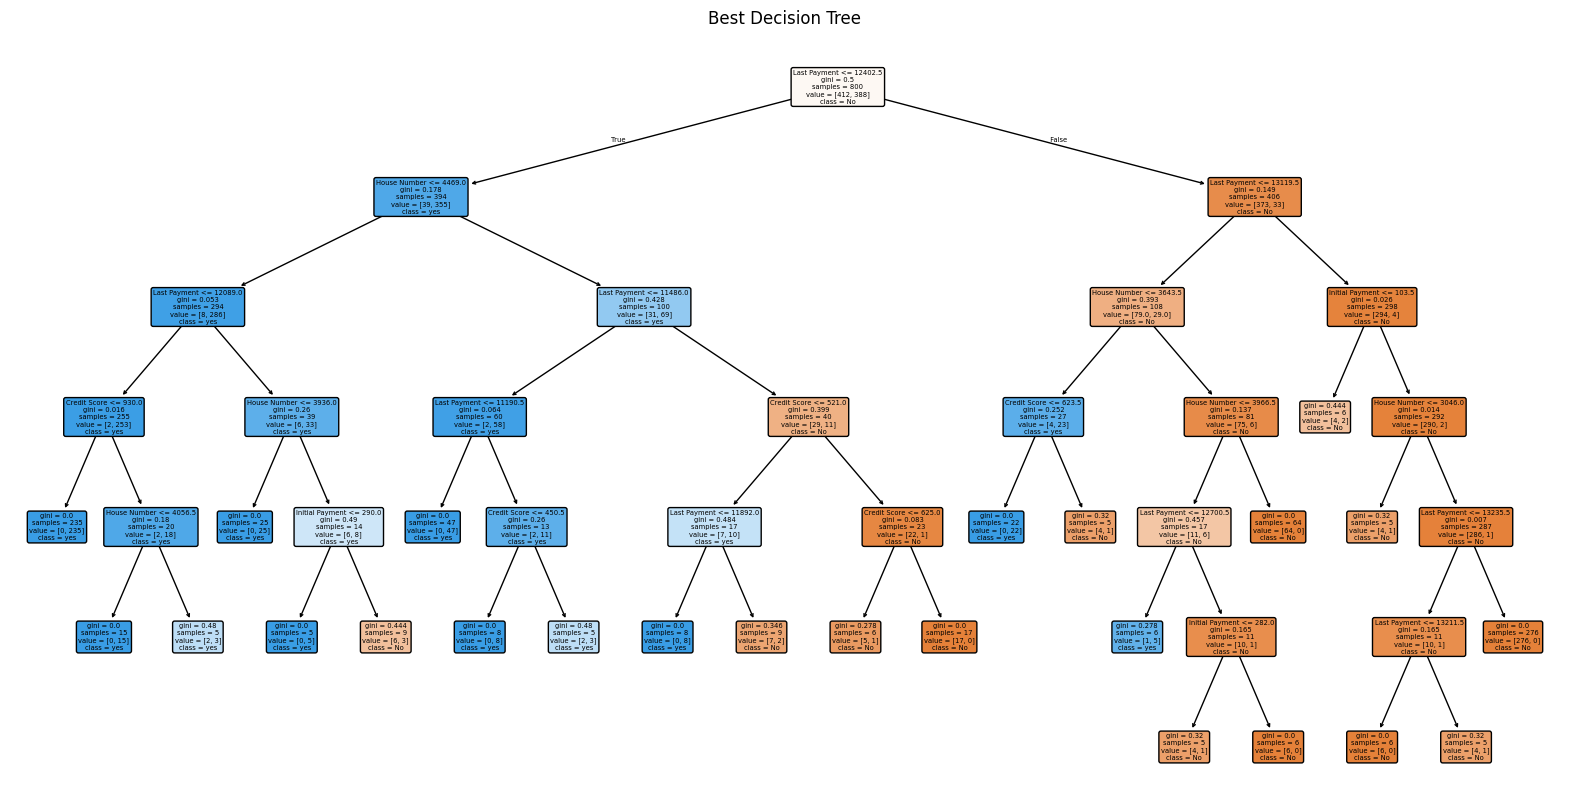

['best_decision_tree_model.pkl']

In [118]:
# Separate features (X) and target (Y)
X = balance_data.iloc[:, 0:4] 
Y = balance_data.iloc[:, 4]

# Encode the target variable ('yes' -> 1, 'no' -> 0)
le = LabelEncoder()
Y_encode = le.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encode, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],  # None means no limit
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier( random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"\nTest Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Visualize the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True)
plt.title("Best Decision Tree")
plt.show()

# Save the best model (optional)
import joblib
joblib.dump(best_clf, 'best_decision_tree_model.pkl')



#### Pruning data with Pre-pruning 

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, None],  # None means no limit
    'min_samples_leaf': [1, 2, 5, 10]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Pre-pruning: Set constraints
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
print("Pre-pruned Tree Accuracy:", clf.score(X_test, y_test))

Pre-pruned Tree Accuracy: 1.0


#### Prunning Data with Post-Pruning (Cost-Complexity Pruning)

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Post-pruning: Use ccp_alpha
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)  # Get pruning path
ccp_alphas = path.ccp_alphas  # Alpha values to consider

# Train with optimal alpha
clf = DecisionTreeClassifier(ccp_alpha=ccp_alphas[-2], random_state=42)  # Choose alpha
clf.fit(X_train, y_train)

# Evaluate
print("Post-pruned Tree Accuracy:", clf.score(X_test, y_test))

Post-pruned Tree Accuracy: 0.7111111111111111


### Determining the optimal values for max_depth, min_samples_leaf or other pre-pruning parameters 

##### Use Cross-Validation with GridSearchCV


In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],  # None means no limit
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_clf = grid_search.best_estimator_
print("Test Accuracy:", best_clf.score(X_test, y_test))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5}
Test Accuracy: 1.0


##### Visualize the Tree

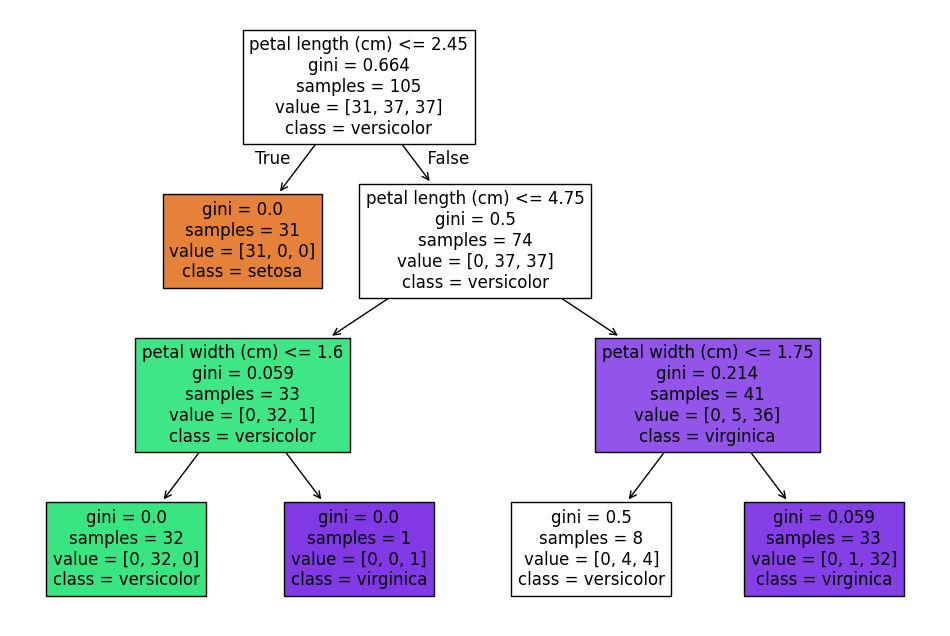

In [122]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

##### Use Learning Curves

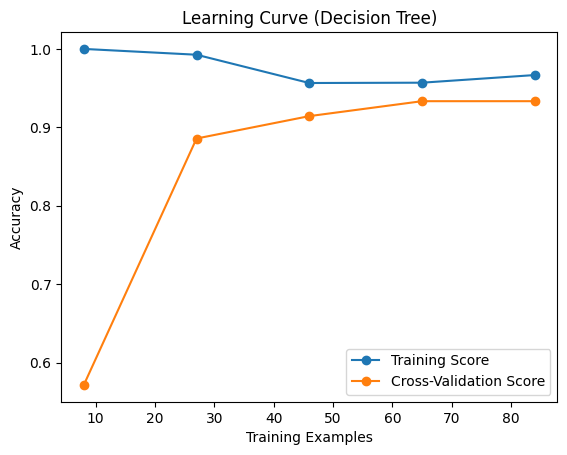

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for a decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
plot_learning_curve(clf, "Learning Curve (Decision Tree)", X_train, y_train)

##### Start with Defaults and Adjust

In [124]:
for max_depth in [3, 5, 7, None]:
    for min_samples_leaf in [1, 2, 5, 10]:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, Train Accuracy={train_score:.2f}, Test Accuracy={test_score:.2f}")

max_depth=3, min_samples_leaf=1, Train Accuracy=0.95, Test Accuracy=1.00
max_depth=3, min_samples_leaf=2, Train Accuracy=0.94, Test Accuracy=1.00
max_depth=3, min_samples_leaf=5, Train Accuracy=0.94, Test Accuracy=1.00
max_depth=3, min_samples_leaf=10, Train Accuracy=0.94, Test Accuracy=0.98
max_depth=5, min_samples_leaf=1, Train Accuracy=0.99, Test Accuracy=1.00
max_depth=5, min_samples_leaf=2, Train Accuracy=0.97, Test Accuracy=1.00
max_depth=5, min_samples_leaf=5, Train Accuracy=0.94, Test Accuracy=1.00
max_depth=5, min_samples_leaf=10, Train Accuracy=0.94, Test Accuracy=0.98
max_depth=7, min_samples_leaf=1, Train Accuracy=1.00, Test Accuracy=1.00
max_depth=7, min_samples_leaf=2, Train Accuracy=0.97, Test Accuracy=1.00
max_depth=7, min_samples_leaf=5, Train Accuracy=0.94, Test Accuracy=1.00
max_depth=7, min_samples_leaf=10, Train Accuracy=0.94, Test Accuracy=0.98
max_depth=None, min_samples_leaf=1, Train Accuracy=1.00, Test Accuracy=1.00
max_depth=None, min_samples_leaf=2, Train Acc